Straighten

Import packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import membranequant as mq

Load image

In [2]:
file_path = '../test_datasets/dataset1_n2/00/_00_w2488 SP 535-50 Nelio.TIF'
img = mq.load_image(file_path)

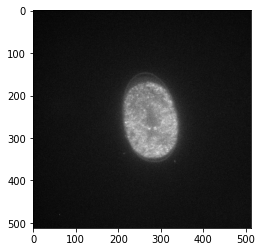

In [3]:
plt.imshow(img, cmap='gray')

Specify ROI

In [4]:
%matplotlib tk
roi = mq.def_roi(img, spline=True, periodic=True)
%matplotlib inline

Calculate local gradients

In [5]:
xcoors = roi[:, 0]
ycoors = roi[:, 1]
rises = np.diff(ycoors, prepend=ycoors[-1])
runs = np.diff(xcoors, prepend=xcoors[-1])
grad = rises / runs
tangent_grad = -1 / grad

Get grid coordinates

In [6]:
thickness = 50

offsets = np.linspace(thickness / 2, -thickness / 2, thickness)
xchange = ((offsets ** 2)[np.newaxis, :] / (1 + tangent_grad ** 2)[:, np.newaxis]) ** 0.5
ychange = xchange / abs(grad)[:, np.newaxis]
newcoors_x = xcoors[:, np.newaxis] + np.sign(rises)[:, np.newaxis] * np.sign(offsets)[np.newaxis, :] * xchange
newcoors_y = ycoors[:, np.newaxis] - np.sign(runs)[:, np.newaxis] * np.sign(offsets)[np.newaxis, :] * ychange

In [20]:
%matplotlib tk
plt.imshow(img, cmap='gray')
plt.plot(newcoors_x, newcoors_y, linewidth=1, c='aqua')
plt.plot(newcoors_x.T, newcoors_y.T, linewidth=1, c='aqua')
plt.show()
%matplotlib inline

Get straightened image by interpolation

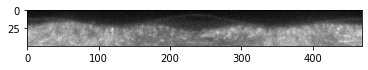

In [8]:
from scipy.ndimage.interpolation import map_coordinates

order = 3
straight = map_coordinates(img.T, [newcoors_x, newcoors_y], order=3, mode='nearest').T

plt.imshow(straight, cmap='gray')

Straighten function

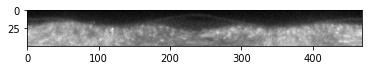

In [9]:
straight_img = mq.straighten(img=img, roi=roi, thickness=50, interp='cubic')

plt.imshow(straight_img, cmap='gray')